<a href="https://colab.research.google.com/github/gustavoramos82/visualiza-o-prouni-2017/blob/main/Eda_Prouni_visualiza%C3%A7%C3%A3o_macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Visualização do Prouni

Neste projeto, será feito uma análise exploratória a partir do dataset obtido no kaggle (que pode ser acessado [aqui](https://www.kaggle.com/datasets/raphaelmarconato/pro-uni-scholarship-2017)) com dados de todos os estudantes que foram aprovados nos anos de 2017.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
prouni = pd.read_csv('/content/drive/MyDrive/Datasets/pda-prouni-2017.csv',sep=';')
prouni.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2017,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,***72056999**,F,Branca,29/04/1992,N,Sul,PR,SAO JOSE DOS PINHAIS
1,2017,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,***74440980**,M,Branca,24/01/1999,N,Sul,PR,TOLEDO
2,2017,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,***78689980**,M,Branca,19/05/1994,N,Sul,PR,CURITIBA
3,2017,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,***90299907**,M,Branca,31/01/1997,N,Sul,PR,TOLEDO
4,2017,10,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,***90445902**,M,Branca,24/11/1994,N,Sul,PR,CURITIBA


apagando o codigo emec da bolsa e cpf pois os mesmos não vão ser necessários para a análise.

In [3]:
prouni.drop(['CODIGO_EMEC_IES_BOLSA','CPF_BENEFICIARIO_BOLSA'],axis=1,
            inplace=True)
prouni.head()

,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,F,Branca,29/04/1992,N,Sul,PR,SAO JOSE DOS PINHAIS
1,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,24/01/1999,N,Sul,PR,TOLEDO
2,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,19/05/1994,N,Sul,PR,CURITIBA
3,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,31/01/1997,N,Sul,PR,TOLEDO
4,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,24/11/1994,N,Sul,PR,CURITIBA


## Dicionário dos Dados

- **ANO CONCESSAO BOLSA**: Ano em que a bolsa foi concedida;
- **NOME IES BOLSA**: Nome da Universidade onde o aluno vai estudar com bolsa;
- **TIPO_BOLSA**: Se é bolsa parcial ou integral;
- **MODALIDADE_ENSINO_BOLSA**: Se é presencial ou a distância;
- **NOME_CURSO_BOLSA**: Nome do curso;
- **NOME_TURNO_CURSO_BOLSA**: Periodo em que o aluno irá estudar;
- **SEXO_BENEFICIARIO_BOLSA**: Gênero do Estudante;
- **RACA_BENEFICIARIO_BOLSA**: Raça que o beneficiário se declarou;
- **DT_NASCIMENTO_BENEFICIARIO**: Data emque o beneficiário nasceu;
- **BENEFICIARIO_DEFICIENTE_FISICO**: Se o beneficiario tem alguma deficiência fisica;
- **REGIAO_BENEFICIARIO_BOLSA**: Região que a bolsa foi concedida;
- **SIGLA_UF_BENEFICIARIO_BOLSA**: Sigla do estado;
- **MUNICIPIO_BENEFICIARIO_BOLSA**: Municipio.

In [4]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236636 entries, 0 to 236635
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ANO_CONCESSAO_BOLSA             236636 non-null  int64 
 1   NOME_IES_BOLSA                  236636 non-null  object
 2   TIPO_BOLSA                      236636 non-null  object
 3   MODALIDADE_ENSINO_BOLSA         236636 non-null  object
 4   NOME_CURSO_BOLSA                236636 non-null  object
 5   NOME_TURNO_CURSO_BOLSA          236636 non-null  object
 6   SEXO_BENEFICIARIO_BOLSA         236636 non-null  object
 7   RACA_BENEFICIARIO_BOLSA         236636 non-null  object
 8   DT_NASCIMENTO_BENEFICIARIO      236636 non-null  object
 9   BENEFICIARIO_DEFICIENTE_FISICO  236636 non-null  object
 10  REGIAO_BENEFICIARIO_BOLSA       236636 non-null  object
 11  SIGLA_UF_BENEFICIARIO_BOLSA     236636 non-null  object
 12  MUNICIPIO_BENEFICIARIO_BOLSA  

In [5]:
prouni['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(prouni['DT_NASCIMENTO_BENEFICIARIO'],
                                                      format='%d/%m/%Y')

In [6]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236636 entries, 0 to 236635
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             236636 non-null  int64         
 1   NOME_IES_BOLSA                  236636 non-null  object        
 2   TIPO_BOLSA                      236636 non-null  object        
 3   MODALIDADE_ENSINO_BOLSA         236636 non-null  object        
 4   NOME_CURSO_BOLSA                236636 non-null  object        
 5   NOME_TURNO_CURSO_BOLSA          236636 non-null  object        
 6   SEXO_BENEFICIARIO_BOLSA         236636 non-null  object        
 7   RACA_BENEFICIARIO_BOLSA         236636 non-null  object        
 8   DT_NASCIMENTO_BENEFICIARIO      236636 non-null  datetime64[ns]
 9   BENEFICIARIO_DEFICIENTE_FISICO  236636 non-null  object        
 10  REGIAO_BENEFICIARIO_BOLSA       236636 non-null  object 

In [7]:
prouni['ANO_CONCESSAO_BOLSA'].value_counts()

2017    236636
Name: ANO_CONCESSAO_BOLSA, dtype: int64

In [8]:
prouni['TIPO_BOLSA'].value_counts()

BOLSA INTEGRAL       155041
BOLSA PARCIAL 50%     81595
Name: TIPO_BOLSA, dtype: int64

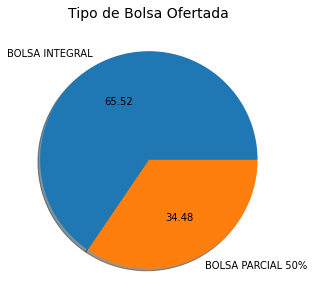

In [9]:
plt.figure(figsize=(10,5))
plt.title('Tipo de Bolsa Ofertada',fontsize=14)
plt.pie(prouni['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni['TIPO_BOLSA'].value_counts().index);

Um pouco mais da metade é com bolsa integral.

In [10]:
prouni['MODALIDADE_ENSINO_BOLSA'].value_counts()

Presencial    184397
EAD            52239
Name: MODALIDADE_ENSINO_BOLSA, dtype: int64

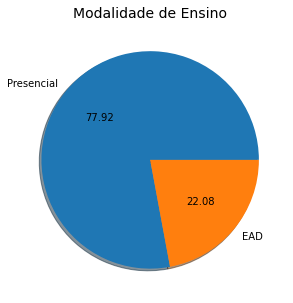

In [11]:
plt.figure(figsize=(10,5))
plt.title('Modalidade de Ensino',fontsize=14)
plt.pie(prouni['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni['MODALIDADE_ENSINO_BOLSA'].value_counts().index);

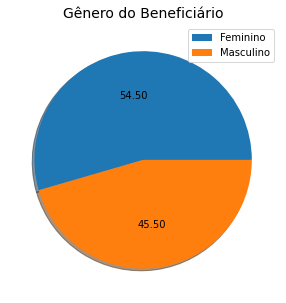

In [12]:
plt.figure(figsize=(10,5))
plt.title('Gênero do Beneficiário',fontsize=14)
plt.pie(prouni['SEXO_BENEFICIARIO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f')
plt.legend(['Feminino','Masculino']);

boa parte dos estudantes optaram pelo ensino presencial

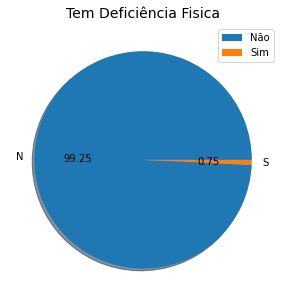

In [13]:
plt.figure(figsize=(10,5))
plt.title('Tem Deficiência Fisica',fontsize=14)
plt.pie(prouni['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts(),shadow=True,
        labels=prouni['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts().index,
        autopct='%1.2f')
plt.legend(['Não','Sim']);

In [14]:
prouni['IDADE'] = 2017 - prouni['DT_NASCIMENTO_BENEFICIARIO'].dt.year

In [15]:
prouni.head()

,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,IDADE
0,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,F,Branca,1992-04-29,N,Sul,PR,SAO JOSE DOS PINHAIS,25
1,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1999-01-24,N,Sul,PR,TOLEDO,18
2,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1994-05-19,N,Sul,PR,CURITIBA,23
3,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1997-01-31,N,Sul,PR,TOLEDO,20
4,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1994-11-24,N,Sul,PR,CURITIBA,23


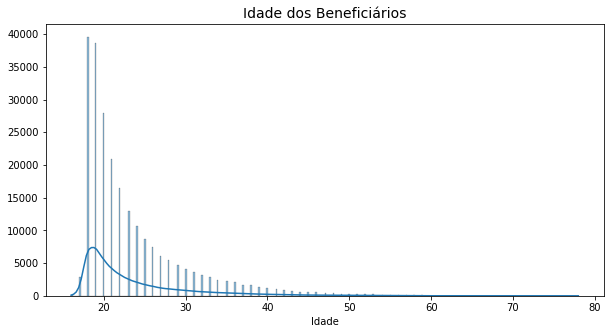

In [16]:
plt.figure(figsize=(10,5))
plt.title('Idade dos Beneficiários',fontsize=14)
sns.histplot(x='IDADE',data=prouni,kde=True)
plt.xlabel('Idade')
plt.ylabel('');

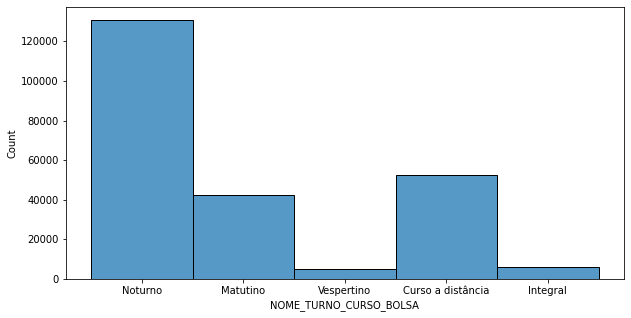

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(x='NOME_TURNO_CURSO_BOLSA',data=prouni)

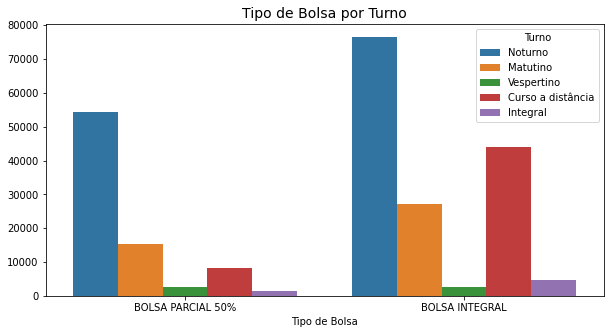

In [18]:
plt.figure(figsize=(10,5))
plt.title('Tipo de Bolsa por Turno',fontsize=14)
sns.countplot(x='TIPO_BOLSA',data=prouni,hue='NOME_TURNO_CURSO_BOLSA')
plt.legend(title='Turno')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('');

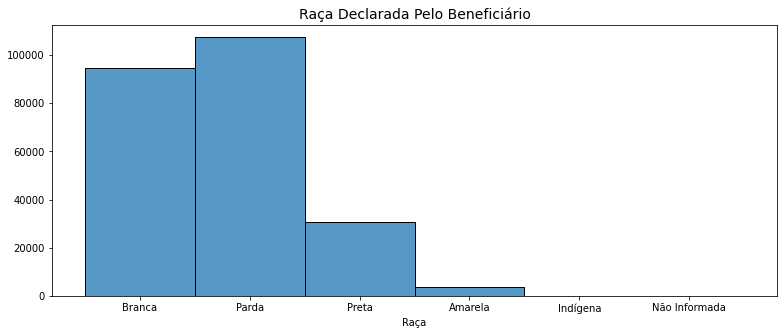

In [19]:
plt.figure(figsize=(13,5))
plt.title('Raça Declarada Pelo Beneficiário',fontsize=14)
sns.histplot(x='RACA_BENEFICIARIO_BOLSA',data=prouni)
plt.xlabel('Raça')
plt.ylabel('');

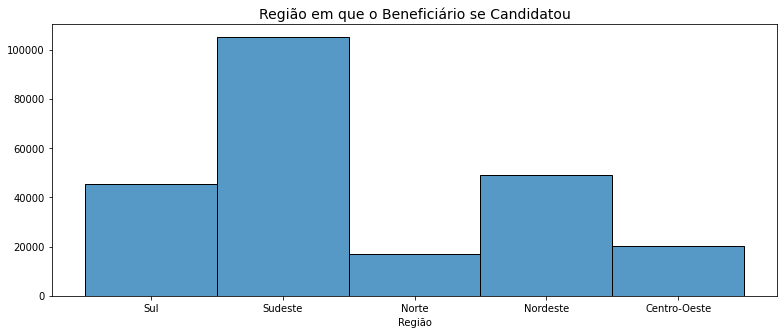

In [20]:
plt.figure(figsize=(13,5))
plt.title('Região em que o Beneficiário se Candidatou',fontsize=14)
sns.histplot(x='REGIAO_BENEFICIARIO_BOLSA',data=prouni)
plt.xlabel('Região')
plt.ylabel('');

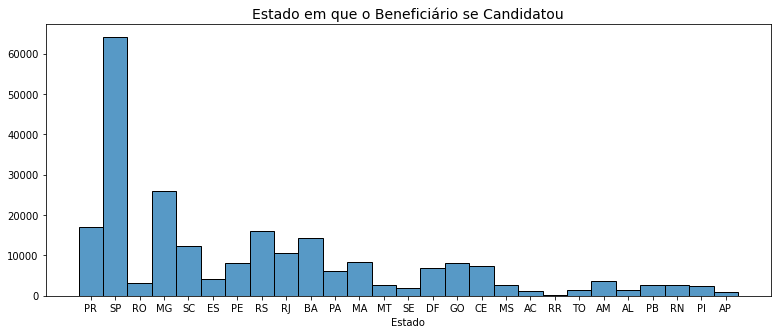

In [21]:
plt.figure(figsize=(13,5))
plt.title('Estado em que o Beneficiário se Candidatou',fontsize=14)
sns.histplot(x='SIGLA_UF_BENEFICIARIO_BOLSA',data=prouni)
plt.xlabel('Estado')
plt.ylabel('');

In [22]:
prouni['NOME_CURSO_BOLSA'].value_counts()[0:30]

Administração                            17217
Direito                                  15570
Pedagogia                                14098
Ciências Contábeis                       10328
Educação Física                           9032
Engenharia Civil                          8101
Enfermagem                                7946
Psicologia                                6150
Gestão De Recursos Humanos                5803
Fisioterapia                              4437
Arquitetura E Urbanismo                   4067
Engenharia De Produção                    3943
Serviço Social                            3847
Nutrição                                  3720
Farmácia                                  3494
Comunicação Social                        3134
Análise E Desenvolvimento De Sistemas     3066
Engenharia Elétrica                       2845
Engenharia Mecânica                       2827
Educaçao Física                           2794
Logística                                 2791
Odontologia  

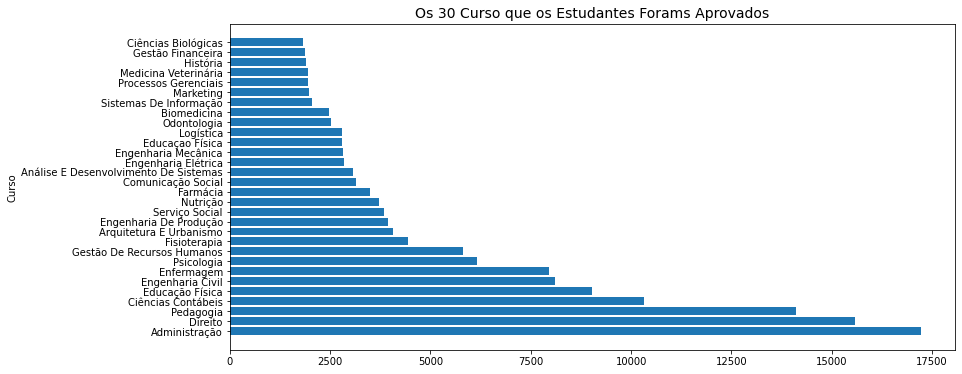

In [23]:
plt.figure(figsize=(13,6))
plt.title('Os 30 Curso que os Estudantes Forams Aprovados',fontsize=14)
plt.barh(prouni['NOME_CURSO_BOLSA'].value_counts().index[0:30],
         prouni['NOME_CURSO_BOLSA'].value_counts()[0:30])
plt.ylabel('Curso');

In [24]:
prouni['NOME_IES_BOLSA'].value_counts()[0:30]

UNIVERSIDADE PAULISTA                                        15289
UNIVERSIDADE PITÁGORAS UNOPAR                                10837
CENTRO UNIVERSITÁRIO INTERNACIONAL                            8139
UNIVERSIDADE ANHANGUERA                                       5859
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS              5034
UNIVERSIDADE NOVE DE JULHO                                    5003
UNIVERSIDADE ESTÁCIO DE SÁ                                    3557
UNIVERSIDADE CEUMA                                            3547
UNIVERSIDADE SÃO JUDAS TADEU                                  3219
UNIVERSIDADE LUTERANA DO BRASIL                               3169
CENTRO UNIVERSITÁRIO DE MARINGÁ - UNICESUMAR                  3168
UNIVERSIDADE DO SUL DE SANTA CATARINA                         3034
UNIVERSIDADE CRUZEIRO DO SUL                                  2603
CENTRO UNIVERSITÁRIO LEONARDO DA VINCI                        2498
CENTRO UNIVERSITÁRIO EURO-AMERICANO                           

<BarContainer object of 30 artists>

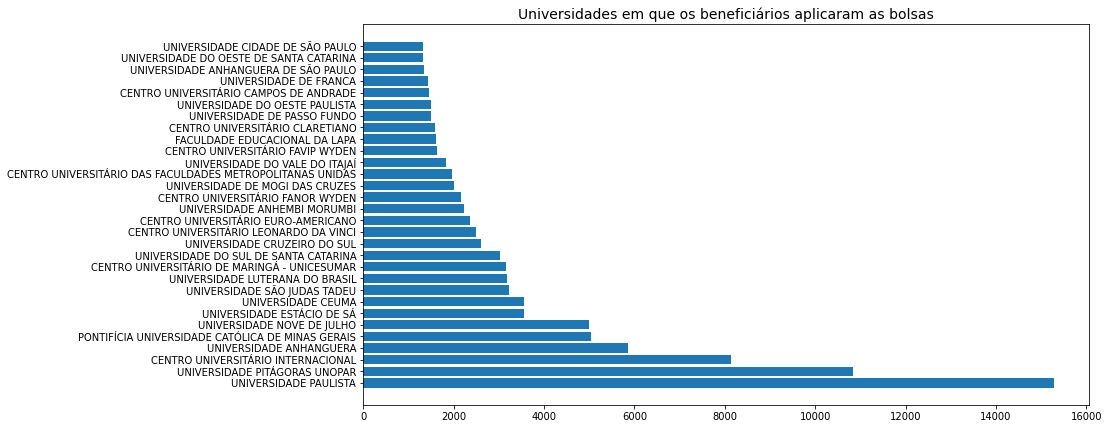

In [25]:
plt.figure(figsize=(13,7))
plt.title('Universidades em que os beneficiários aplicaram as bolsas',fontsize=14)
plt.barh(prouni['NOME_IES_BOLSA'].value_counts().index[0:30],
         prouni['NOME_IES_BOLSA'].value_counts()[0:30])

In [27]:
prouni_20 = prouni[prouni['IDADE']<=20]
prouni_20.head()

,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,IDADE
1,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1999-01-24,N,Sul,PR,TOLEDO,18
3,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1997-01-31,N,Sul,PR,TOLEDO,20
5,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,F,Branca,1998-03-27,N,Sul,PR,LONDRINA,19
6,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Sociais,Noturno,F,Branca,1999-09-06,N,Sul,PR,CURITIBA,18
7,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Comunicação Social,Matutino,F,Branca,1999-12-02,N,Sul,PR,CAMPO LARGO,18


In [33]:
prouni_20['NOME_CURSO_BOLSA'].value_counts()[0:30]

Direito                                                           8922
Administração                                                     7478
Enfermagem                                                        4472
Pedagogia                                                         4442
Ciências Contábeis                                                4412
Engenharia Civil                                                  4155
Educação Física                                                   3693
Psicologia                                                        3480
Fisioterapia                                                      2778
Arquitetura E Urbanismo                                           2536
Nutrição                                                          2126
Comunicação Social                                                2049
Gestão De Recursos Humanos                                        1988
Farmácia                                                          1834
Odonto

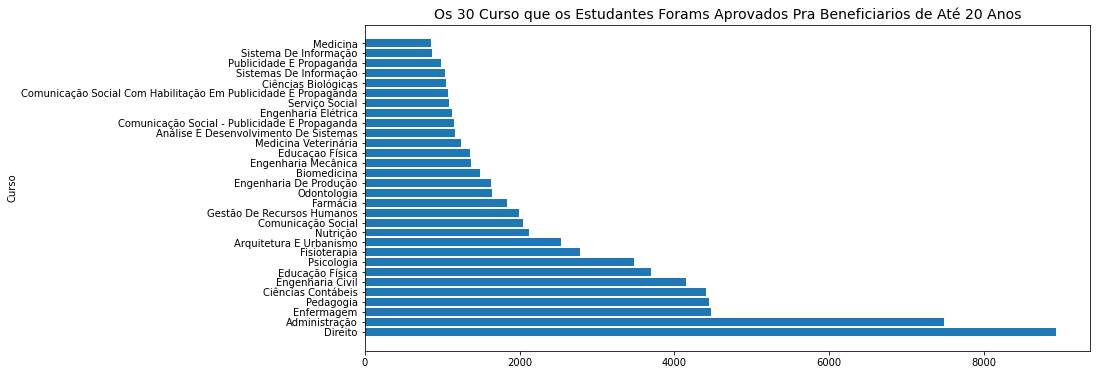

In [34]:
plt.figure(figsize=(13,6))
plt.title('Os 30 Curso que os Estudantes Forams Aprovados Pra Beneficiarios de Até 20 Anos',fontsize=14)
plt.barh(prouni_20['NOME_CURSO_BOLSA'].value_counts().index[0:30],
         prouni_20['NOME_CURSO_BOLSA'].value_counts()[0:30])
plt.ylabel('Curso');